## Download the Data

In [4]:
import urllib.request
import zipfile
import os
import numpy as np

def download_datasets():
    # Download the folder
    !gdown --folder 1579owXfSSeM8FZq3DdoauCUofMCahdzV

    # Find all CSV files in the datasets folders
    csv_files = []
    for root, dirs, files in os.walk("datasets"):
        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))

    # Load the CSV files as numpy matrices
    datasets = {}
    for file in csv_files:
        matrix = np.loadtxt(file, delimiter=",")
        file_name = os.path.basename(file).split('.')[0]
        datasets[file_name] = matrix

    return datasets

In [5]:
datasets = download_datasets()

Retrieving folder list
Processing file 1uInvZ0oug5wAOcBHWc1WT3JMUFWsM95H .DS_Store
Retrieving folder 1pujZYM8Lc9oEZhBvyv_U_WJ7YB25hjWA concrete
Processing file 19zsGCG9lulysdOeYhljjfZAZ8hpyvdU1 concrete-test.csv
Processing file 1COSlcnzXPzYBJOMnQhNknG0w02SkJs5Q concrete-train.csv
Retrieving folder 146_OyoT-zTjaoD-usJ-vA6N1OxT91i2n synth1
Processing file 1PM1_BjetTjhEFnnrxWVzgo11T8SXc9-7 synth1-test.csv
Processing file 1mFIU2jNTQYm7QOJRKFmB7iYGxCzf_Bpb synth1-train.csv
Retrieving folder 1tk_P3AVPamlx-EPgSHNylezwiY42BDTj synth2
Processing file 1qvN1jK21Ls4Y1-BkfASlGDNOzGe7QEld synth2-test.csv
Processing file 1LXMTakd6DfcujHD3IVrrwOjHDHlk1JyT synth2-train.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1uInvZ0oug5wAOcBHWc1WT3JMUFWsM95H
To: /content/datasets/.DS_Store
100% 6.15k/6.15k [00:00<00:00, 21.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=19zsGCG9lulysdOeYhljjfZ

# Decisões de Implementação

1. **Representação de um indivíduo (genótipo):**
##### Árvore de expressão, na qual os nós internos são operadores (como adição, subtração, multiplicação e divisão) e os nós folhas são terminais (variáveis e constantes).

2. **Geração da população inicial:**
##### A população inicial é gerada aleatoriamente, com árvores de expressão de diferentes tamanhos e formas. Define-se uma profundidade máxima permitida para as árvores. Para adicionar diversidade à população inicial, utiliza-se uma combinação de métodos de geração, como o método de crescimento completo e o método de crescimento rampa.

3. **Operadores genéticos:**
##### A reprodução envolve a cópia direta de um indivíduo selecionado para a próxima geração. O cruzamento consiste em escolher dois indivíduos e trocar uma subárvore entre eles, criando dois novos indivíduos. A mutação envolve a alteração aleatória de um nó em uma árvore, substituindo-o por outro nó compatível (um operador por outro operador, ou um terminal por outro terminal).

4. **Facilidades para variação de parâmetros:**
##### Em vez de usar parâmetros hardcoded, foi criado uma configuração centralizada, (uma estrutura de configuração), que pode ser facilmente alterada. Isso permitirá o ajuste dos parâmetros, como a taxa de cruzamento, a taxa de mutação, o tamanho da população, o número máximo de gerações e a profundidade máxima da árvore, sem modificar o código principal. Essa abordagem facilita a análise de sensibilidade dos parâmetros e a avaliação das soluções alcançadas.

# Tentativo 1 de Implementação


In [3]:
pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 34.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import random
import operator
import numpy as np

### **Node**

In [31]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class Tree:
    def __init__(self, max_depth, terminals, operators):
        self.root = None
        self.max_depth = max_depth
        self.terminals = terminals
        self.operators = operators
    
    def generate_random_tree(self, depth):
        if depth >= self.max_depth:
            return Node(random.choice(self.terminals))
        
        node = Node(random.choice(self.operators))
        node.left = self.generate_random_tree(depth+1)
        node.right = self.generate_random_tree(depth+1)
        return node
        
    def evaluate(self, x_values):
        return self._evaluate_node(self.root, x_values)
    
    def _evaluate_node(self, node, x_values):
        if node is None:
            return 0.0
        
        if isinstance(node.value, str):
            if node.value in self.terminals:
                return x_values[self.terminals.index(node.value)]
            else:
                return 0.0
        
        left_val = self._evaluate_node(node.left, x_values)
        right_val = self._evaluate_node(node.right, x_values)
        
        if node.value == '+':
            return left_val + right_val
        elif node.value == '-':
            return left_val - right_val
        elif node.value == '*':
            return left_val * right_val
        elif node.value == '/':
            if right_val != 0.0:
                return left_val / right_val
            else:
                return 0.0
        
        return 0.0
    
    def infix_expression(self):
        return self._infix_expression_node(self.root)
    
    def _infix_expression_node(self, node):
        if isinstance(node.value, str):
            return node.value
        
        left_expr = self._infix_expression_node(node.left)
        right_expr = self._infix_expression_node(node.right)
        
        if node.value == '+':
            return '(' + left_expr + ' + ' + right_expr + ')'
        elif node.value == '-':
            return '(' + left_expr + ' - ' + right_expr + ')'
        elif node.value == '*':
            return '(' + left_expr + ' * ' + right_expr + ')'
        elif node.value == '/':
            return '(' + left_expr + ' / ' + right_expr + ')'
        
        return ''


In [49]:
t = Tree(4, ["x"], ["+", "-"])
t.root = t.generate_random_tree(4)

In [50]:
t.infix_expression()

'x'

In [ ]:
t

In [103]:
import random
import math

# define the non-terminal symbols
class Expr:
    def __init__(self, left, op, right):
        self.left = left
        self.op = op
        self.right = right
        
    def evaluate(self, variables):
        left_value = self.left.evaluate(variables)
        right_value = self.right.evaluate(variables)
        if self.op == "+":
            return left_value + right_value
        elif self.op == "-":
            return left_value - right_value
        elif self.op == "*":
            return left_value * right_value
        elif self.op == "/":
            return left_value / right_value
        else:
            raise ValueError(f"Unknown operator: {self.op}")

class Func:
    def __init__(self, name, arg):
        self.name = name
        self.arg = arg
        
    def evaluate(self, variables):
        arg_value = self.arg.evaluate(variables)
        if self.name == "sin":
            return math.sin(arg_value)
        elif self.name == "cos":
            return math.cos(arg_value)
        elif self.name == "exp":
            return math.exp(arg_value)
        elif self.name == "log":
            return math.log(arg_value)
        else:
            raise ValueError(f"Unknown function: {self.name}")
        
class Var:
    def __init__(self, name):
        self.name = name
        
    def evaluate(self, variables):
        return variables[self.name]
        
class Constant:
    def __init__(self, value):
        self.value = value
        
    def evaluate(self, variables):
        return self.value

# define the terminal symbols
operators = ["+", "-", "*", "/"]
functions = ["sin", "cos", "exp", "log"]
variables = ["x1", "x2"]
constants = ["a", "b", "c"]

CONSTANT_RATE = 0.5
FUNCTION_RATE = 0

# define the production rules
def generate_expr(depth):
    if depth <= 0:
        if random.random() < CONSTANT_RATE:
          return Constant(random.uniform(-10, 10))
        else:
          return Var("x")
    elif random.random() < FUNCTION_RATE:
        name = random.choice(functions)
        arg = generate_expr(depth-1)
        return Func(name, arg)
    else:
        left = generate_expr(depth-1)
        op = random.choice(operators)
        right = generate_expr(depth-1)

        return Expr(left, op, right)

def generate_expr_iter(depth, variables):
    stack = []
    for i in range(depth):
        if random.random() < FUNCTION_RATE:
            name = random.choice(functions)
            arg = stack.pop()
            stack.append(Func(name, arg))
        else:
            if random.random() < CONSTANT_RATE:
                stack.append(Constant(random.uniform(-10, 10)))
            else:
                stack.append(Var(random.choice(variables)))
            while len(stack) > 1:
                right = stack.pop()
                left = stack.pop()
                op = random.choice(operators)
                stack.append(Expr(left, op, right))
    return stack[0]


def generate_var():
    return Var(random.choice(variables))

def generate_constant():
    return Constant(random.uniform(-10, 10))

# define the start symbol
def generate_individual(depth):
    return generate_expr(depth)


NameError: ignored

In [62]:
def print_individual(individual):
    if isinstance(individual, Expr):
        left_str = print_individual(individual.left)
        right_str = print_individual(individual.right)
        return f"({left_str} {individual.op} {right_str})"
    elif isinstance(individual, Func):
        arg_str = print_individual(individual.arg)
        return f"{individual.name}({arg_str})"
    elif isinstance(individual, Var):
        return individual.name
    elif isinstance(individual, Constant):
        return str(individual.value)
    else:
        raise ValueError(f"Unknown individual type: {type(individual)}")


In [101]:
# test the grammar
individual = generate_individual(2)
individual

-
-
/


In [68]:
variables = {"x1": 1, "x2": 1, "x3": 1, "x4": 1, "x5": 1}
print(individual.evaluate(variables))

17.18067094813396


In [102]:
print_individual(individual)

'((x - x) - (x / x))'

In [52]:
X = [[1, 1, 2], [2, 2, 4]]

In [53]:
expr = Expr(None, "+", None)

In [54]:
expr.evaluate(X[0])

AttributeError: ignored

In [14]:
# Nó da árvore de expressão
class Node:
    def __init__(self, function=None, value=None):
        self.function = function
        self.value = value
        self.children = []

    def evaluate(self, x):
        if self.function:
            return self.function(*[child.evaluate(x) for child in self.children])
        else:
            return self.value(x)

In [21]:
expression = generate_random_expression(depth=3)
expression_string = print_expression(expression)
print(expression_string)

(((x1 + x2) * (x3 + x4)) / x5) = 0


In [25]:
expression.evaluate([1,1,1,1,2])

TypeError: ignored

### **Seleção**

In [ ]:
# Avaliação de fitness
def fitness(individual, X, Y):
    predictions = [individual.evaluate(x) for x in X]
    error = np.mean((Y - predictions)**2)
    return 1 / (1 + error)

def fitness(individual, X, Y):
    N = X.shape[0]
    errors = np.square(individual.evaluate(X) - Y)
    rmse = np.sqrt(np.sum(errors) / N)
    return rmse

# Seleção
def tournament_selection(population, X, Y, k=3):
    if k > len(population):
          k = len(population)

    selected = random.sample(population, k)
    fitnesses = [fitness(ind, X, Y) for ind in selected]
    return selected[np.argmax(fitnesses)]

### **Operadores Genéticos**

In [ ]:
# Cruzamento
def crossover(parent1, parent2):
    if not parent1.children or not parent2.children or random.random() > CROSSOVER_RATE:
        return parent1, parent2

    # Escolher ponto de cruzamento aleatoriamente em ambos os pais
    crossover_point1 = random.randint(0, len(parent1.children) - 1)
    crossover_point2 = random.randint(0, len(parent2.children) - 1)

    # Trocar subárvores entre os pais
    parent1.children[crossover_point1], parent2.children[crossover_point2] = parent2.children[crossover_point2], parent1.children[crossover_point1]

    return parent1, parent2

# Mutação
def mutate(individual):
    if not individual.children or random.random() > MUTATION_RATE:
        return individual

    mutation_point = random.randint(0, len(individual.children) - 1)
    individual.children[mutation_point] = generate_random_expression(MAX_DEPTH - 1)

    return individual

### **Geração da população inicial**

In [8]:
# Gerar população inicial
def generate_random_expression(depth):
    if depth == 0 or random.random() < 0.1:
        terminal = random.choice(TERMINALS)
        return Node(value=terminal)
    else:
        function = random.choice(list(FUNCTIONS.keys()))
        node = Node(function=FUNCTIONS[function])
        for _ in range(2):
            node.children.append(generate_random_expression(depth-1))
        return node

In [9]:
from graphviz import Digraph
from IPython.display import Image


def visualize_tree_graph(node, graph=None, parent=None):
    if graph is None:
        graph = Digraph('Expression Tree', format='png')
        
    if node.function:
        label = FUNCTION_MAP[node.function.__name__]
    else:
        label = TERMINAL_MAP[node.value.__name__]
        
    graph.node(str(id(node)), label)
    
    if parent:
        graph.edge(str(id(parent)), str(id(node)))

    for child in node.children:
        visualize_tree_graph(child, graph, node)

    return graph

In [5]:
root = generate_random_expression(3)
graph = visualize_tree_graph(root)
png_data = graph.pipe()
Image(png_data)

NameError: name 'generate_random_expression' is not defined

In [22]:
# Funções e terminais disponíveis
FUNCTION_MAP = {
    "add" : "+",
    "sub": "-",
    "mul": "*",
    "<lambda>": "/"
}
TERMINAL_MAP = {
    "<lambda>" : "x"
}


def print_expression(node):
  global x_count
  x_count = 0
  expr = print_expression_aux(node)
  return expr + " = y"

def print_expression_aux(node):
    global x_count
    if node.function:
        left_child = node.children[0]
        right_child = node.children[1]
        left_expression = print_expression_aux(left_child)
        right_expression = print_expression_aux(right_child)
        return f"({left_expression} {FUNCTION_MAP[node.function.__name__]} {right_expression})"
    else:
        x_count += 1
        return TERMINAL_MAP[node.value.__name__] + str(x_count)



In [16]:
# Example usage:
expression = generate_random_expression(depth=3)
expression_string = print_expression(expression)
print(expression_string)

(((x1 + x2) / (x3 + x4)) * ((x5 * x6) + (x7 * x8))) = 0


### **Algoritmo Genético**

In [ ]:
def genetic():
  population = [generate_random_expression(MAX_DEPTH) for _ in range(POPULATION_SIZE)]

  # Algoritmo genético
  X = np.random.uniform(-1, 1, size=(100, 1))
  Y = np.sin(X)

  for generation in range(NUM_GENERATIONS):
      new_population = []
      for _ in range(POPULATION_SIZE // 2):
          parent1 = tournament_selection(population, X, Y)
          parent2 = tournament_selection(population, X, Y)
          offspring1, offspring2 = crossover(parent1, parent2)
          offspring1 = mutate(offspring1)
          offspring2 = mutate(offspring2)
          new_population.extend([offspring1, offspring2])
          population = new_population

      # Avaliar e exibir o melhor indivíduo na geração atual
      best_individual = max(population, key=lambda ind: fitness(ind, X, Y))
      best_fitness = fitness(best_individual, X, Y)
      print(f"Melhor fitness na geração {generation + 1}: {best_fitness}")

  # Exibir o melhor indivíduo encontrado após todas as gerações
  best_individual = max(population, key=lambda ind: fitness(ind, X, Y))
  best_fitness = fitness(best_individual, X, Y)
  print(f"Melhor fitness geral: {best_fitness}")


### **Versão Debugável**

### **Funções e terminais**

In [12]:
# Funções e terminais disponíveis
FUNCTIONS = {
    "+": operator.add,
    "-": operator.sub,
    "*": operator.mul,
    "/": lambda a, b: a / b if b != 0 else 1
}
TERMINALS = [
    lambda x: x,
    lambda _: 1
]

### **Parâmetros**

In [ ]:
# Parâmetros
POPULATION_SIZE = 100
MAX_DEPTH = 5
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.9
NUM_GENERATIONS = 50

# **Testes**

In [ ]:
genetic()

Melhor fitness na geração 1: 0.6136256951327067
Melhor fitness na geração 2: 1.44759072825306e-13
Melhor fitness na geração 3: 0.7928148866866553
Melhor fitness na geração 4: 0.001352882253066952


KeyboardInterrupt: ignored

# Tentativo 2 de Implementação


In [1]:
POPSIZE: 1000
GENERATIONS: 50
ELITISM: 100                    # number of individuals that survive
PROB_CROSSOVER: 0.9
PROB_MUTATION: 0.05
TSIZE: 3
INCLUDE_GENOTYPE: False
SAVE_STEP: 500
VERBOSE: True
MIN_TREE_DEPTH: 10
MAX_TREE_DEPTH: 10
ADAPTIVE: False
LEARNING_FACTOR: 0.01

In [3]:
# Grammar
grammar = """<start> ::= <expr>
<expr> ::= <expr><op><expr>|(<expr><op><expr>)|<var>
<op> ::= +|-|*|\eb_div_/eb
<var> ::= x[0]|1.0
"""

In [13]:
grammar_dic = {
    "<start>" : ["<expr>"],
    "<expr>" : ["<expr><op><expr>","(<expr><op><expr>)","<var>"],
    "<op>" : ["+","-","*","/"],
    "<var>" : ["x", "1.0"]
}

start_rule = "<start>"

TERMINALS = grammar_dic["<op>"] + grammar_dic["<var>"]


In [ ]:
def generate_random_individual():
    genotype = [[] for _ in grammar_dic]
    tree_depth = grammar.recursive_individual_creation(genotype, start_rule, 0)
    return {'genotype': genotype, 'fitness': None, 'tree_depth' : tree_depth}

In [ ]:
max_init_depth = 5

In [ ]:
def recursive_individual_creation(genome, symbol, current_depth):
        codon = np.random.uniform()
        if current_depth > max_init_depth:
            prob_non_recursive = 0.0
            for rule in shortest_path[symbol][1:]:
                index = self.grammar[symbol].index(rule)
                prob_non_recursive += self.pcfg[self.index_of_non_terminal[symbol],index]
            prob_aux = 0.0
            for rule in self.shortest_path[(symbol,'NT')][1:]:
                index = self.grammar[symbol].index(rule)
                new_prob = self.pcfg[self.index_of_non_terminal[symbol],index] / prob_non_recursive
                prob_aux += new_prob
                if codon <= round(prob_aux,3):
                    expansion_possibility = index
                    break

In [14]:
for nt in grammar_dic.keys():
  

dict_keys(['<start>', '<expr>', '<op>', '<var>'])

In [17]:
import collections


class OrderedSet(collections.abc.MutableSet):
    """
    From http://code.activestate.com/recipes/528878-ordered-set/
    """

    def __init__(self, iterable=None):
        self.end = end = []
        end += [None, end, end]  # sentinel node for doubly linked list
        self.map = {}  # key --> [key, prev, next]
        if iterable is not None:
            self |= iterable

    def __len__(self):
        return len(self.map)

    def __contains__(self, key):
        return key in self.map

    def index(self, elem):
        if elem in self.map:
            return next(i for i, e in enumerate(self) if e == elem)
        else:
            raise KeyError("That element isn't in the set")

    def add(self, key):
        if key not in self.map:
            end = self.end
            curr = end[1]
            curr[2] = end[1] = self.map[key] = [key, curr, end]

    def discard(self, key):
        if key in self.map:
            key, prev, next = self.map.pop(key)
            prev[2] = next
            next[1] = prev

    def __iter__(self):
        end = self.end
        curr = end[2]
        while curr is not end:
            yield curr[0]
            curr = curr[2]

    def __reversed__(self):
        end = self.end
        curr = end[1]
        while curr is not end:
            yield curr[0]
            curr = curr[1]

    def pop(self, last=True):
        if not self:
            raise KeyError('set is empty')
        key = self.end[1][0] if last else self.end[2][0]
        self.discard(key)
        return key

    def __repr__(self):
        if not self:
            return '%s()' % (self.__class__.__name__,)
        return '%s(%r)' % (self.__class__.__name__, list(self))

    def __eq__(self, other):
        if isinstance(other, OrderedSet):
            return len(self) == len(other) and list(self) == list(other)
        return set(self) == set(other)

In [64]:
import re
import json
import numpy as np

class Grammar:
    """Class that represents a grammar. It works with the prefix notation."""
    NT = "NT"
    T = "T"
    NT_PATTERN = "(<.+?>)"
    RULE_SEPARATOR = "::="
    PRODUCTION_SEPARATOR = "|"

    def __init__(self, grammar_file=None):
        self.grammar_file = grammar_file
        self.grammar = {}
        self.productions_labels = {}
        self.non_terminals, self.terminals = set(), set()
        self.ordered_non_terminals = OrderedSet()
        self.non_recursive_options = {}
        self.number_of_options_by_non_terminal = None
        self.start_rule = None
        self.max_depth = None
        self.max_init_depth = None
        self.max_number_prod_rules = 0
        self.pcfg = None
        self.pcfg_mask = None
        self.pcfg_path = None
        self.index_of_non_terminal = {}
        self.shortest_path = {}

    def set_path(self, grammar_path):
        self.grammar_file = grammar_path

    def set_pcfg_path(self, pcfg_path):
        self.pcfg_path = pcfg_path

    def set_min_init_tree_depth(self, min_tree_depth):
        self.max_init_depth = min_tree_depth

    def set_max_tree_depth(self, max_tree_depth):
        self.max_depth = max_tree_depth

    def get_max_depth(self):
        return self.max_depth
    
    def get_max_init_depth(self):
        return self.max_init_depth

    def read_grammar(self):
        """
        Reads a Grammar in the BNF format and converts it to a python dictionary
        This method was adapted from PonyGE version 0.1.3 by Erik Hemberg and James McDermott
        """
        if self.grammar_file is None:
            raise Exception("You need to specify the path of the grammar file")


        with open(self.grammar_file, "r") as f:
            for line in f:
                if not line.startswith("#") and line.strip() != "":
                    if line.find(self.PRODUCTION_SEPARATOR):
                        left_side, productions = line.split(self.RULE_SEPARATOR)
                        left_side = left_side.strip()
                        if not re.search(self.NT_PATTERN, left_side):
                            raise ValueError("Left side not a non-terminal!")
                        self.non_terminals.add(left_side)
                        self.ordered_non_terminals.add(left_side)
                        # assumes that the first rule in the file is the axiom
                        if self.start_rule is None:
                            self.start_rule = (left_side, self.NT)
                        temp_productions = []
                        for production in [production.strip() for production in productions.split(self.PRODUCTION_SEPARATOR)]:
                            temp_production = []
                            if not re.search(self.NT_PATTERN, production):
                                if production == "None":
                                    production = ""
                                self.terminals.add(production)
                                temp_production.append((production, self.T))
                            else:
                                for value in re.findall("<.+?>|[^<>]*", production):
                                    if value != "":
                                        if re.search(self.NT_PATTERN, value) is None:
                                            sym = (value, self.T)
                                            self.terminals.add(value)
                                        else:
                                            sym = (value, self.NT)
                                        temp_production.append(sym)
                            temp_productions.append(temp_production)                          
                        self.max_number_prod_rules = max(self.max_number_prod_rules, len(temp_productions))
                        if left_side not in self.grammar:
                            self.grammar[left_side] = temp_productions
        
        if self.pcfg_path is not None:
            # load PCFG probabilities from json file. List of lists, n*n, with n = max number of production rules of a NT
            with open(self.pcfg_path) as f:
                self.pcfg = np.array(json.load(f))
        else:
            self.generate_uniform_pcfg()
        # self.compute_non_recursive_options()
        self.find_shortest_path()


    def find_shortest_path(self):
        open_symbols = []
        for nt in self.grammar.keys():
            depth = self.minimum_path_calc((nt,'NT'), open_symbols)
            
    def minimum_path_calc(self, current_symbol, open_symbols):
        if current_symbol[1] == self.T:
            return 0
        else:
            open_symbols.append(current_symbol)
            for derivation_option in self.grammar[current_symbol[0]]:
                max_depth = 0
                if current_symbol not in self.shortest_path:
                    self.shortest_path[current_symbol] = [999999]
                if bool(sum([i in open_symbols for i in derivation_option])):
                    continue
                if current_symbol not in derivation_option:
                    for symbol in derivation_option:
                        depth = self.minimum_path_calc(symbol, open_symbols)
                        depth += 1
                        if depth > max_depth:
                            max_depth = depth

                    if max_depth < self.shortest_path[current_symbol][0]:
                        self.shortest_path[current_symbol] = [max_depth]
                        if derivation_option not in self.shortest_path[current_symbol]:
                            self.shortest_path[current_symbol].append(derivation_option)
                    if max_depth == self.shortest_path[current_symbol][0]:
                        if derivation_option not in self.shortest_path[current_symbol]:
                            self.shortest_path[current_symbol].append(derivation_option)
            open_symbols.remove(current_symbol)
            return self.shortest_path[current_symbol][0]
                    
            

    def create_counter(self):
        self.counter = dict.fromkeys(self.grammar.keys(),[])
        for k in self.counter.keys():
            self.counter[k] = [0] * len(self.grammar[k])

    def generate_uniform_pcfg(self):
        """
        assigns uniform probabilities to grammar
        """
        array = np.zeros(shape=(len(self.grammar.keys()),self.max_number_prod_rules))
        for i, nt in enumerate(self.grammar):
            number_probs = len(self.grammar[nt])
            prob = 1.0 / number_probs
            array[i,:number_probs] = prob
            if nt not in self.index_of_non_terminal:
                self.index_of_non_terminal[nt] = i
        self.pcfg = array
        self.pcfg_mask = self.pcfg != 0

    def generate_random_pcfg(self):
        pass

    def get_mask(self):
        return self.pcfg_mask

    def get_index_of_non_terminal(self):
        return self.index_of_non_terminal

    def get_non_terminals(self):
        return self.ordered_non_terminals

    def count_number_of_options_in_production(self):
        if self.number_of_options_by_non_terminal is None:
            self.number_of_options_by_non_terminal = {}
            for nt in self.ordered_non_terminals:
                self.number_of_options_by_non_terminal.setdefault(nt, len(self.grammar[nt]))
        return self.number_of_options_by_non_terminal

    def list_non_recursive_productions(self, nt):
        non_recursive_elements = []
        for options in self.grammar[nt]:
            for option in options:
                if option[1] == self.NT and option[0] == nt:
                    break
            else:
                non_recursive_elements += [options]
        return non_recursive_elements

    def recursive_individual_creation(self, genome, symbol, current_depth):
        codon = np.random.uniform()
        if current_depth > self.max_init_depth:
            prob_non_recursive = 0.0
            for rule in self.shortest_path[(symbol,'NT')][1:]:
                index = self.grammar[symbol].index(rule)
                prob_non_recursive += self.pcfg[self.index_of_non_terminal[symbol],index]
            prob_aux = 0.0
            for rule in self.shortest_path[(symbol,'NT')][1:]:
                index = self.grammar[symbol].index(rule)
                new_prob = self.pcfg[self.index_of_non_terminal[symbol],index] / prob_non_recursive
                prob_aux += new_prob
                if codon <= round(prob_aux,3):
                    expansion_possibility = index
                    break
        else:
            prob_aux = 0.0
            for index, option in enumerate(self.grammar[symbol]):
                prob_aux += self.pcfg[self.index_of_non_terminal[symbol],index]
                if codon <= round(prob_aux,3):
                    expansion_possibility = index
                    break

        genome[self.get_non_terminals().index(symbol)].append([expansion_possibility,codon])
        expansion_symbols = self.grammar[symbol][expansion_possibility]
        depths = [current_depth]
        for sym in expansion_symbols:
            if sym[1] != self.T:
                depths.append(self.recursive_individual_creation(genome, sym[0], current_depth + 1))
        return max(depths)

    def mapping(self, mapping_rules, positions_to_map=None, needs_python_filter=False):
        if positions_to_map is None:
            positions_to_map = [0] * len(self.ordered_non_terminals)
        output = []
        max_depth = self._recursive_mapping(mapping_rules, positions_to_map, self.start_rule, 0, output)
        output = "".join(output)
        if self.grammar_file.endswith("pybnf"):
            output = self.python_filter(output)
        return output, max_depth

    def _recursive_mapping(self, mapping_rules, positions_to_map, current_sym, current_depth, output):
        depths = [current_depth]
        print(current_sym)
        print(self.T)
        if current_sym[1] == self.T:
            output.append(current_sym[0])
        else:
            current_sym_pos = self.ordered_non_terminals.index(current_sym[0])
            choices = self.grammar[current_sym[0]]
            codon = np.random.uniform()
            if positions_to_map[current_sym_pos] >= len(mapping_rules[current_sym_pos]):
                # Experiencia
                if current_depth > self.max_depth:
                    prob_non_recursive = 0.0
                    for rule in self.shortest_path[current_sym][1:]:
                        index = self.grammar[current_sym[0]].index(rule)
                        prob_non_recursive += self.pcfg[self.index_of_non_terminal[current_sym[0]],index]
                    prob_aux = 0.0
                    for rule in self.shortest_path[current_sym][1:]:
                        index = self.grammar[current_sym[0]].index(rule)
                        new_prob = self.pcfg[self.index_of_non_terminal[current_sym[0]],index] / prob_non_recursive
                        prob_aux += new_prob
                        if codon <= round(prob_aux,3):
                            expansion_possibility = index
                            break
                else:
                    prob_aux = 0.0
                    for index, option in enumerate(self.grammar[current_sym[0]]):
                        prob_aux += self.pcfg[self.index_of_non_terminal[current_sym[0]],index]
                        if codon <= round(prob_aux,3):
                            expansion_possibility = index
                            break
                mapping_rules[current_sym_pos].append([expansion_possibility,codon])
            else:
                # re-mapping with new probabilities
                print("Mapping Rules ", mapping_rules)
                print("Current Sym ", current_sym)
                print("Current Sym Pos ", current_sym_pos)
                print("Mapping Rules on Current Sym Pos ", mapping_rules[current_sym_pos])
                print("Positions to map ", positions_to_map)
                print("Positions to map on Current Sym Pos ", positions_to_map[current_sym_pos])
                print("codon without [1] ", mapping_rules[current_sym_pos][positions_to_map[current_sym_pos]])
                codon = mapping_rules[current_sym_pos][positions_to_map[current_sym_pos]]
                # If codon is list, get [1]
                if isinstance(codon, list):
                    codon = codon[1]
                if current_depth > self.max_depth:
                    prob_non_recursive = 0.0
                    for rule in self.shortest_path[(current_sym[0],'NT')][1:]:
                        index = self.grammar[current_sym[0]].index(rule)
                        prob_non_recursive += self.pcfg[self.index_of_non_terminal[current_sym[0]],index]
                    prob_aux = 0.0
                    for rule in self.shortest_path[(current_sym[0],'NT')][1:]:
                        index = self.grammar[current_sym[0]].index(rule)
                        new_prob = self.pcfg[self.index_of_non_terminal[current_sym[0]],index] / prob_non_recursive
                        prob_aux += new_prob
                        if codon <= round(prob_aux,3):
                            expansion_possibility = index
                            break
                else:
                    prob_aux = 0.0
                    for index, option in enumerate(self.grammar[current_sym[0]]):
                        prob_aux += self.pcfg[self.index_of_non_terminal[current_sym[0]],index]
                        if codon <= round(prob_aux,3):
                            expansion_possibility = index
                            break
            # update mapping rules com a updated expansion possibility
            mapping_rules[current_sym_pos][positions_to_map[current_sym_pos]] = [expansion_possibility, codon]
            current_production = expansion_possibility
            positions_to_map[current_sym_pos] += 1
            next_to_expand = choices[current_production]
            for next_sym in next_to_expand:
                depths.append(
                    self._recursive_mapping(mapping_rules, positions_to_map, next_sym, current_depth + 1, output))
        return max(depths)

    def compute_non_recursive_options(self):
        for key in self.grammar.keys():
            prob_non_recursive = 0.0
            non_recursive_prods = []
            for index, option in enumerate(self.grammar[key]):
                for s in option:
                    if s[0] == key:
                        break
                else:
                    prob_non_recursive += self.pcfg[self.index_of_non_terminal[key],index]
                    non_recursive_prods.append([index, option])
            self.non_recursive_options[key] = [non_recursive_prods, prob_non_recursive]

    def get_non_recursive_options(self, symbol):
        return self.non_recursive_options[symbol]


    def get_dict(self):
        return self.grammar

    def get_pcfg(self):
        return self.pcfg

    def get_shortest_path(self):
        return self.shortest_path

    @staticmethod
    def python_filter(txt):
        """ Create correct python syntax.
        We use {: and :} as special open and close brackets, because
        it's not possible to specify indentation correctly in a BNF
        grammar without this type of scheme."""
        txt = txt.replace("/le", "<=")
        txt = txt.replace("/ge", ">=")
        txt = txt.replace("/l", "<")
        txt = txt.replace("/g", ">")
        txt = txt.replace("/eb", "|")
        indent_level = 0
        tmp = txt[:]
        i = 0
        while i < len(tmp):
            tok = tmp[i:i+2]
            if tok == "{:":
                indent_level += 1
            elif tok == ":}":
                indent_level -= 1
            tabstr = "\n" + "  " * indent_level
            if tok == "{:" or tok == ":}" or tok == "/n":
                tmp = tmp.replace(tok, tabstr, 1)
            i += 1
            # Strip superfluous blank lines.
            txt = "\n".join([line for line in tmp.split("\n") if line.strip() != ""])
        return txt

    def get_start_rule(self):
        return self.start_rule

    def __str__(self):
        grammar = self.grammar
        text = ""
        for key in self.ordered_non_terminals:
            text += key + " ::= "
            for options in grammar[key]:
                for option in options:
                    text += option[0]
                if options != grammar[key][-1]:
                    text += " | "
            text += "\n"
        return text

# Create one instance and export its methods as module-level functions.
# The functions share state across all uses
# (both in the user's code and in the Python libraries), but that's fine
# for most programs and is easier for the casual user


In [26]:
_inst = Grammar()
set_path = _inst.set_path
set_pcfg_path = _inst.set_pcfg_path
read_grammar = _inst.read_grammar
get_non_terminals = _inst.get_non_terminals
count_number_of_options_in_production = _inst.count_number_of_options_in_production
list_non_recursive_productions = _inst.list_non_recursive_productions
recursive_individual_creation = _inst.recursive_individual_creation
mapping = _inst.mapping
start_rule = _inst.get_start_rule
set_max_tree_depth = _inst.set_max_tree_depth
set_min_init_tree_depth = _inst.set_min_init_tree_depth
get_max_depth = _inst.get_max_depth
get_non_recursive_options = _inst.get_non_recursive_options
# compute_non_recursive_options = _inst.compute_non_recursive_options
get_dict = _inst.get_dict
get_pcfg = _inst.get_pcfg
get_mask = _inst.get_mask
get_shortest_path = _inst.get_shortest_path
get_index_of_non_terminal = _inst.get_index_of_non_terminal
ordered_non_terminals = _inst.ordered_non_terminals
max_init_depth = _inst.get_max_init_depth
python_filter = _inst.python_filter

In [65]:
g = Grammar("grammars/regression.txt")
g.read_grammar()

In [66]:
g.read_grammar()
g.set_max_tree_depth(9)

In [48]:
genome = [[0], [0, 3, 3], [0], [], [1, 1]]

In [49]:
mapping_numbers = [0] * len(genome)

In [68]:
g.grammar

{'<start>': [[('<expr>', 'NT')]],
 '<expr>': [[('<expr>', 'NT'), ('<op>', 'NT'), ('<expr>', 'NT')],
  [('(', 'T'), ('<expr>', 'NT'), ('<op>', 'NT'), ('<expr>', 'NT'), (')', 'T')],
  [('<var>', 'NT')]],
 '<op>': [[('+', 'T')], [('-', 'T')], [('*', 'T')], [('\\eb_div_\\eb', 'T')]],
 '<var>': [[('x[0]', 'T')], [('1.0', 'T')]]}

In [69]:
g.start_rule

('<start>', 'NT')

In [67]:
print(g.mapping(genome, mapping_numbers, needs_python_filter=True))

('<start>', 'NT')
T
('<expr>', 'NT')
T
Mapping Rules  [[[0, 0], [0, 0.8420644070046309], [0, 0.955463325123809]], [[0, 0], 3, 3], [0], [], [1, 1]]
Current Sym  ('<expr>', 'NT')
Current Sym Pos  1
Mapping Rules on Current Sym Pos  [[0, 0], 3, 3]
Positions to map  [3, 1, 0, 0, 0]
Positions to map on Current Sym Pos  1
codon without [1]  3


UnboundLocalError: local variable 'expansion_possibility' referenced before assignment

In [67]:
grammar_dic = {
            '<start>': [
                [('<expr>', 'NT')]
            ], 
            '<expr>': [
                [('<expr>', 'NT'), ('<op>', 'NT'), ('<expr>', 'NT')], 
                [('(', 'T'), ('<expr>', 'NT'), ('<op>', 'NT'), ('<expr>', 'NT'), (')', 'T')], 
                [('<var>', 'NT')]
            ],
            '<op>': [
                [('+', 'T')], 
                [('-', 'T')], 
                [('*', 'T')], 
                [('|_div_|', 'T')]
            ],
            '<var>': [
                [('x[0]', 'T')], 
                [('1.0', 'T')]
            ]
        }

In [71]:
shortest_path = {}

def minimum_path_calc(current_symbol, open_symbols):
        if current_symbol[1] == "T":
            return 0
        else:
            open_symbols.append(current_symbol)
            for derivation_option in grammar_dic[current_symbol[0]]:
                max_depth = 0
                if current_symbol not in shortest_path:
                    shortest_path[current_symbol] = [999999]
                if bool(sum([i in open_symbols for i in derivation_option])):
                    continue
                if current_symbol not in derivation_option:
                    for symbol in derivation_option:
                        depth = minimum_path_calc(symbol, open_symbols)
                        depth += 1
                        if depth > max_depth:
                            max_depth = depth

                    if max_depth < shortest_path[current_symbol][0]:
                        shortest_path[current_symbol] = [max_depth]
                        if derivation_option not in shortest_path[current_symbol]:
                            shortest_path[current_symbol].append(derivation_option)
                    if max_depth == shortest_path[current_symbol][0]:
                        if derivation_option not in shortest_path[current_symbol]:
                            shortest_path[current_symbol].append(derivation_option)
            open_symbols.remove(current_symbol)
            return shortest_path[current_symbol][0]

In [76]:
open_symbols = []
for nt in grammar_dic.keys():
    depth = minimum_path_calc((nt,'NT'), open_symbols)

In [77]:
shortest_path

{('<start>', 'NT'): [3, [('<expr>', 'NT')]],
 ('<expr>', 'NT'): [2, [('<var>', 'NT')]],
 ('<var>', 'NT'): [1, [('x[0]', 'T')], [('1.0', 'T')]],
 ('<op>', 'NT'): [1,
  [('+', 'T')],
  [('-', 'T')],
  [('*', 'T')],
  [('\\eb_div_\\eb', 'T')]]}

In [78]:
shortest_path2 = {
            ('<start>', 'NT'): [3, grammar_dic['<start>'][0]],
            ('<expr>', 'NT'): [2, grammar_dic['<expr>'][2]],
            ('<var>', 'NT'): [1, grammar_dic['<var>'][0], grammar_dic['<var>'][1]],
            ('<op>', 'NT'): [1,grammar_dic['<op>'][0], grammar_dic['<op>'][1],grammar_dic['<op>'][2], grammar_dic['<op>'][3]]
        }

In [15]:
phen = '(1.0+1.0+1.0/1.0+((1.0+x[0]/(1.0*1.0)*(x[0]*1.0)/(x[0]-x[0]))-x[0]+x[0]+1.0+x[0]/(1.0+1.0/1.0))/((1.0-((x[0]+x[0])/x[0]-1.0))/1.0))'

In [19]:
fit_case = [1,1]

In [22]:
import numpy as np

In [45]:
X_train = np.array([[1, 1], [2, 2], [1, 2], [0, 1], [0, 0], [2, 1]])
y_train = np.array([2, 4, 3, 1, 0, 3])

In [50]:
def evaluate(expr, x):
    if isinstance(x, (list, np.ndarray)):
        return x[0]
    else:
        return x

In [ ]:
def protec_div(x, y):
    if y == 0:
        return 0
    else:
        return x / y

class Infix:
    def __init__(self, function):
        self.function = function

    def __ror__(self, other):
        return Infix(lambda x, self=self, other=other: self.function(other, x))

    def __or__(self, other):
        return self.function(other)

    def __rlshift__(self, other):
        return Infix(lambda x, self=self, other=other: self.function(other, x))

    def __rshift__(self, other):
        return self.function(other)

    def __call__(self, value1, value2):
        return self.functi
    
_div_ = Infix(protec_div)

X_train = np.array([[1, 1], [2, 2], [1, 2], [0, 1], [0, 0], [2, 1]])
y_train = np.array([2, 4, 3, 1, 0, 3])
phen_test = '(x[1]+x[1]-(((x[0]*x[1]*x[1])|protec_div|x[1]+x[0]-x[1])+(x[0]*x[1])|protec_div|(x[0]*x[0])|protec_div|(x[0]|protec_div|x[1]-x[1]))*x[1]-((x[0]*x[1])+x[1]|protec_div|x[1])|protec_div|((x[1]|protec_div|x[0])-x[1])*x[1])'
result = eval(phen_test, globals(), {'x': X_train[0], 'protec_div': _div_})
result

0

In [ ]:

X = [1]
mey_expr = '1+2*x[0]'

result = eval(phen_test, globals(), {'x': X_train[0], 'protec_div': _div_})

result

In [ ]:
"""(x[1]+x[1]-(((x[0]*x[1]*x[1])|protec_div|x[1]+x[0]-x[1])+(x[0]*x[1])|protec_div|(x[0]*x[0])
|protec_div|(x[0]|protec_div|x[1]-x[1]))*x[1]-
((x[0]*x[1])+x[1]|protec_div|x[1])|protec_div|
((x[1]|protec_div|x[0])-x[1])*x[1])"""

In [112]:
n = {}
for nt in ['<start>', '<expr>', '<op>', '<var>']:
    n.setdefault(nt, len(grammar_dic[nt]))
n

{'<start>': 1, '<expr>': 3, '<op>': 4, '<var>': 2}

In [55]:
def evaluate(x):
    if isinstance(x, np.ndarray):
        return x[0]
    else:
        return 0
X_train = np.array([[1, 1], [2, 2], [1, 2], [0, 1], [0, 0], [2, 1]])
eval_result = np.vectorize(evaluate)(X_train)
eval_result

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [57]:
X_train

array([[1, 1],
       [2, 2],
       [1, 2],
       [0, 1],
       [0, 0],
       [2, 1]])

In [65]:
y_train.shape[0]

6

In [62]:
y_hat = np.zeros(y_train.shape)
y_hat

array([0., 0., 0., 0., 0., 0.])

In [71]:
non_terminals = list(grammar_dic.keys())

In [73]:
nt = '<start>'

In [74]:
non_terminals.index(nt)

0

In [58]:
def evaluate(x):
    return 0
X_train = np.array([[1, 1], [2, 2], [1, 2], [0, 1], [0, 0], [2, 1]])
eval_result = np.vectorize(evaluate)(X_train)
eval_result

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [56]:
import numpy as np

def my_sum(x):
    return x[0] + x[1]

vectorized_sum = np.vectorize(my_sum)

# Example usage
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

result = vectorized_sum(matrix)
print("Result:\n", result)

IndexError: invalid index to scalar variable.

In [25]:
{"phen": phen}["phen"](X_train)

TypeError: 'str' object is not callable

In [20]:
eval(phen, globals(), {"x": fit_case[:-1]})

ZeroDivisionError: float division by zero

In [1]:
%load_ext autoreload
%autoreload 2

In [94]:
np.multiply(X_train[:,0], X_train[:,1])

array([45,  6, 32,  0,  8, 24,  0, 14,  0,  9, 54,  0,  1,  0, 21, 36, 12,
       18,  6, 18, 21,  8,  0,  2,  7, 30,  0, 45,  0, 20,  0,  0,  4,  4,
        8,  0, 10, 56,  0,  9, 48, 24, 28, 48, 64,  0, 72, 45, 32,  0, 21,
        9,  0, 12,  0,  1,  9,  0, 56, 27, 81, 56, 10, 40, 35, 45,  4,  8,
       40, 48,  4, 28,  0, 16,  9, 81, 14,  0, 35, 42, 18, 27,  7, 45, 24,
       27,  9, 20, 18, 16,  0,  0,  7,  9,  8,  4, 35,  0, 24,  0])

In [92]:
X_train[:,0]

array([9, 2, 4, 5, 1, 6, 0, 2, 1, 1, 6, 0, 1, 0, 3, 9, 6, 2, 1, 3, 3, 2,
       2, 2, 7, 5, 0, 9, 0, 5, 8, 4, 2, 4, 2, 0, 5, 8, 1, 9, 8, 8, 4, 8,
       8, 0, 8, 9, 4, 6, 3, 3, 1, 6, 0, 1, 9, 0, 8, 3, 9, 7, 5, 5, 5, 5,
       4, 2, 5, 6, 2, 7, 4, 2, 9, 9, 2, 0, 5, 7, 2, 9, 1, 9, 8, 9, 3, 5,
       6, 4, 0, 0, 7, 1, 8, 2, 5, 0, 3, 0])

In [95]:
X_train = np.random.randint(low=0, high=10, size=(100, 2))
y_train = np.reshape(np.multiply(X_train[:,0], X_train[:,1]), (100,1))
np.column_stack((X_train, y_train))

array([[ 8,  9, 72],
       [ 0,  9,  0],
       [ 3,  8, 24],
       [ 9,  7, 63],
       [ 3,  9, 27],
       [ 0,  8,  0],
       [ 1,  4,  4],
       [ 3,  3,  9],
       [ 8,  5, 40],
       [ 2,  3,  6],
       [ 3,  9, 27],
       [ 8,  9, 72],
       [ 0,  7,  0],
       [ 8,  3, 24],
       [ 0,  2,  0],
       [ 7,  5, 35],
       [ 5,  0,  0],
       [ 2,  0,  0],
       [ 1,  4,  4],
       [ 7,  2, 14],
       [ 1,  3,  3],
       [ 8,  2, 16],
       [ 2,  9, 18],
       [ 8,  5, 40],
       [ 0,  8,  0],
       [ 5,  4, 20],
       [ 9,  9, 81],
       [ 4,  9, 36],
       [ 8,  2, 16],
       [ 0,  6,  0],
       [ 6,  1,  6],
       [ 0,  3,  0],
       [ 4,  5, 20],
       [ 7,  3, 21],
       [ 3,  6, 18],
       [ 6,  0,  0],
       [ 4,  7, 28],
       [ 1,  7,  7],
       [ 1,  3,  3],
       [ 2,  3,  6],
       [ 5,  1,  5],
       [ 3,  4, 12],
       [ 0,  8,  0],
       [ 4,  0,  0],
       [ 9,  4, 36],
       [ 7,  9, 63],
       [ 1,  1,  1],
       [ 2,  

In [82]:
import numpy as np
import srs

# Load the datasets
def load_data():
    import os
    
    # Find all CSV files in the datasets folders
    csv_files = []
    for root, dirs, files in os.walk("datasets"):
        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))

    # Load the CSV files as numpy matrices
    datasets = {}
    for file in csv_files:
        matrix = np.genfromtxt(file, delimiter=",")
        file_name = os.path.basename(file).split('.')[0]
        datasets[file_name] = matrix

    return datasets

solver = srs.SymbolicRegressionSolver()
X_train = np.random.randint(low=0, high=10, size=(100, 2))
y_train = np.reshape(np.multiply(X_train[:,0], X_train[:,1]), (100,1))

X_test = np.array([[1, 0], [100, 2], [300, 3], [13, 1], [87, 13]])
y_test = np.array([0, 200, 900, 13, 1131])

solver.fit(X_train, y_train)
predicted = solver.predict(X_test)

score = solver.score(y_test, predicted)
print(str(score*100) + '%')

# Testing
"""
datasets = load_data()
X_train = datasets['synth1-train'][:, :2]
y_train = datasets['synth1-train'][:, 2]

X_test = datasets['synth1-test'][:, :2]
y_test = datasets['synth1-test'][:, 2]

solver.fit(X_train, y_train)
solver.predict(X_test)
solver.score(y_test)


solver.print_predicted_expression()
print(solver.best_fitness())
print(solver.worst_fitness())
"""

IndexError: index 2 is out of bounds for axis 0 with size 2

In [104]:
print("Phenotype 1:\n", "  | Fitness: ",solver.evolutionary_alg.Xy_evaluate(phen1, X_train, y_train), "\n   | Y Prediction: ", solver.predict(X_test[:5], custom_phenotype=phen1))
print("Phenotype 2:\n", "  | Fitness: ",solver.evolutionary_alg.Xy_evaluate(phen2, X_train, y_train), "\n   | Y Prediction: ", solver.predict(X_test[:5], custom_phenotype=phen2))
print("Phenotype 3:\n", "  | Fitness: ",solver.evolutionary_alg.Xy_evaluate(phen3, X_train, y_train), "\n   | Y Prediction: ", solver.predict(X_test[:5], custom_phenotype=phen3))


Phenotype 1:
   | Fitness:  33.14288522724303 
   | Y Prediction:  [-1.25       -1.24439226 -1.23881935 -1.23328172 -1.22777984]
Phenotype 2:
   | Fitness:  22.477572022018308 
   | Y Prediction:  [-6.   -5.98 -5.96 -5.94 -5.92]
Phenotype 3:
   | Fitness:  22.838040664669215 
   | Y Prediction:  [0. 0. 0. 0. 0.]


## Testes e Esperimentos

In [2]:
import numpy as np
import srs

# Load the datasets
def load_data():
    import os
    
    # Find all CSV files in the datasets folders
    csv_files = []
    for root, dirs, files in os.walk("datasets"):
        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))

    # Load the CSV files as numpy matrices
    datasets = {}
    for file in csv_files:
        matrix = np.genfromtxt(file, delimiter=",")
        file_name = os.path.basename(file).split('.')[0]
        datasets[file_name] = matrix

    return datasets
datasets = load_data()

In [37]:
datasets['concrete' + '-train'][:, -1]

array([20.73, 32.1 , 31.87, 21.95, 29.98, 71.62, 39.94,  9.69, 41.24,
       52.42, 18.  , 45.9 , 33.09, 13.52, 42.42, 49.9 , 26.15, 22.44,
       24.99, 30.88, 22.5 , 39.36, 33.4 , 35.1 , 33.56, 10.35, 19.42,
       44.64, 52.52, 37.8 , 77.3 , 40.6 , 38.2 , 45.3 , 50.51, 37.42,
       47.13, 33.72, 32.72, 25.37, 82.6 ,  9.45, 33.8 , 15.75, 27.23,
       76.24, 42.13, 73.7 , 37.81, 21.97, 30.14, 57.03, 39.66, 44.14,
       53.72, 17.96, 47.28, 24.58, 31.35, 41.05, 27.68, 17.84, 43.7 ,
       21.16, 16.5 , 41.2 , 39.  , 24.4 , 35.3 , 17.24, 77.3 , 41.68,
       27.83, 76.8 , 33.  , 21.07, 37.17, 14.99, 29.87, 32.76, 14.14,
       24.44, 37.36, 79.3 , 49.99, 14.99, 14.2 ,  6.94, 28.8 , 38.6 ,
       33.04, 50.66,  4.83, 29.55, 64.02, 39.  , 25.75, 54.9 , 65.2 ,
       50.46, 17.44, 45.08, 59.8 , 36.44, 38.89, 13.2 , 15.52, 13.52,
       17.54, 33.36, 54.28, 33.72, 39.42, 17.82, 59.76, 15.53, 45.71,
       47.78, 26.91, 40.87, 21.91, 48.72, 46.9 , 61.09, 32.63, 31.25,
       64.9 , 22.53,

In [38]:
name = 'concrete'
X_train = datasets[name + '-train'][:, :-1]
y_train = datasets[name + '-train'][:, -1]

X_test = datasets[name + '-test'][:, :-1]
y_test = datasets[name + '-test'][:, -1]

solver = srs.SymbolicRegressionSolver()

# Experiments
scores = {}
NUM_EXPERIMENTS_PER_CONFIG = 1
POPULATIONS = [50, 100, 500]
GENERATIONS = [50, 100, 500]
best_of_each = {} # Map {'experiment' : 'name_of_best'}

### 1. Padrão

In [40]:
# 1. Default
for psize in POPULATIONS:
    for gsize in GENERATIONS:
        if gsize == 500 and psize == 500:
            continue
        for it in range(NUM_EXPERIMENTS_PER_CONFIG):
            experiment_name = name+'-default-' + '-pop:' + str(psize) + '-gens:' + str(gsize) + '-it:' + str(it)
            solver.update_params(pop_size=psize, max_generations=gsize)
            solver.fit(X_train, y_train, experiment_name)
            y_hat = solver.predict(X_test, name=experiment_name)
            scores[experiment_name] = solver.score(y_test, y_hat)

best_of_each[name+'default'] = solver.get_best_experiment(name + '-default')

Starting evolution...
Generation: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Starting evolution...
Generation: 
0 

KeyboardInterrupt: 

### 2. Roleta

In [ ]:
# 2. Different selection
it = 0
for i in range(NUM_EXPERIMENTS_PER_CONFIG):
    experiment_name = name+'-roulette-'+str(it)
    solver.update_params(tournament_size=0)
    solver.fit(X_train, y_train, experiment_name)
    y_hat = solver.predict(X_test, name=experiment_name)
    scores[experiment_name] = solver.score(y_test, y_hat, name=experiment_name)
    it += 1

best_of_each[name+'roulette'] = solver.get_best_experiment(name + '-roulette')

In [43]:
best_of_each[name+'default'] = solver.get_best_experiment(name + '-default')



In [44]:
best_of_each

{'concreteroulette': None,
 'concretedefault': 'concrete-default--pop:50-gens:50-it:0'}

In [7]:
score_str

'0.0%'

In [2]:
solver.get_best_param_per_generation('avg')

[3696.1998618771836,
 2055.910733993938,
 79.92138850804547,
 319.71022363806276,
 267.8256141886003,
 3458764513820559.5,
 29.403928046163927,
 547.5255990923079,
 9.562502886047943,
 10542.643964796089,
 19274.442968932843,
 5.405889882754066,
 9.384702597316325,
 10.334657676669304,
 8.91858954866347,
 4048.3656029858894,
 4.2262122392901365,
 7.08375569491204,
 21.9497772080152,
 15.937588680257745,
 16.601580904742203,
 4.9743250170770095,
 20.035816801417486,
 4.01317937404191,
 1466.1741672603655,
 2.7294262949751142,
 6.511012703763762,
 4.517378474985485,
 21.41190942624552,
 3.4962898829181936,
 3.3598970385241786]

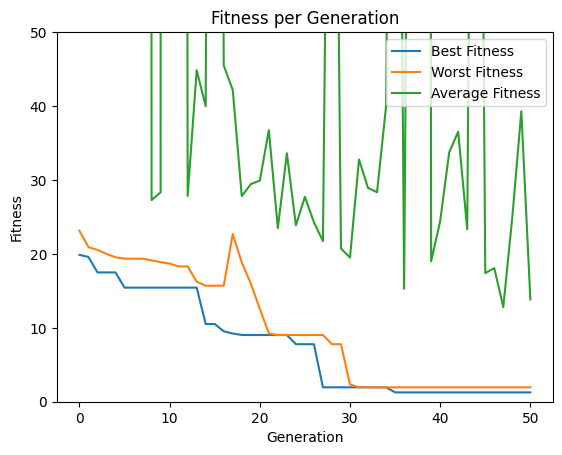

In [22]:
# Data per generation
best_fitness = solver.get_best_param_per_generation('best_all_fitness', 'synth1-default--pop:500-gens:50-it:0')
best_curr_fitness = solver.get_best_param_per_generation('best_curr_fitness', 'synth1-default--pop:500-gens:50-it:0')
worst_fitness = solver.get_best_param_per_generation('worst_curr_fitness', 'synth1-default--pop:500-gens:50-it:0')
avg_fitness = solver.get_best_param_per_generation('avg', 'synth1-default--pop:500-gens:50-it:0')

# Plotting th Best (green), Worst (red) and Average (blue) fitness per generation with labels
# But cap it at fitness=100
import matplotlib.pyplot as plt

plt.plot(best_fitness, label='Best Fitness')
plt.plot(worst_fitness, label='Worst Fitness')
plt.plot(avg_fitness, label='Average Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness per Generation')

# max y value is 100
axes = plt.gca()
axes.set_ylim([0,50])

plt.legend()
plt.show()

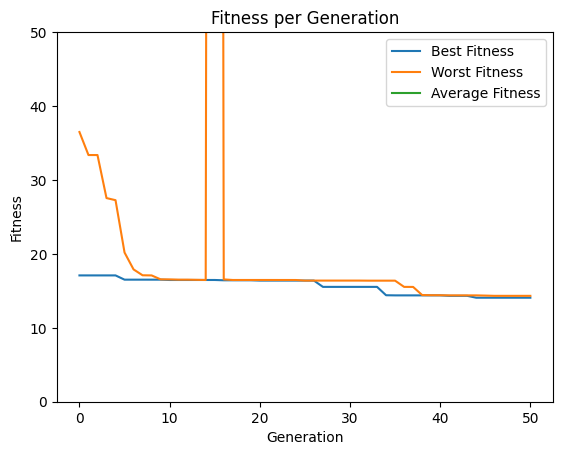

In [45]:
# Data per generation
best_fitness = solver.get_best_param_per_generation('best_all_fitness', 'concrete-default--pop:50-gens:50-it:0')
best_curr_fitness = solver.get_best_param_per_generation('best_curr_fitness', 'concrete-default--pop:50-gens:50-it:0')
worst_fitness = solver.get_best_param_per_generation('worst_curr_fitness', 'concrete-default--pop:50-gens:50-it:0')
avg_fitness = solver.get_best_param_per_generation('avg', 'concrete-default--pop:50-gens:50-it:0')

# Plotting th Best (green), Worst (red) and Average (blue) fitness per generation with labels
# But cap it at fitness=100
import matplotlib.pyplot as plt

plt.plot(best_fitness, label='Best Fitness')
plt.plot(worst_fitness, label='Worst Fitness')
plt.plot(avg_fitness, label='Average Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness per Generation')

# max y value is 100
axes = plt.gca()
axes.set_ylim([0,50])

plt.legend()
plt.show()

In [15]:
for re in solver.results:
    print(re[0])
    print('    |', re[1][-1]['best_all_fitness'])


synth1-default--pop:50-gens:50-it:0
    | 9.012035506226397
synth1-default--pop:50-gens:50-it:0
    | 7.841502237450853
synth1-default--pop:50-gens:100-it:0
    | 1.949596256103095
synth1-default--pop:50-gens:500-it:0
    | 1.9495962561030957
synth1-default--pop:100-gens:50-it:0
    | 8.070306221892217
synth1-default--pop:100-gens:100-it:0
    | 7.143738421384533
synth1-default--pop:100-gens:500-it:0
    | 1.2624109354224906
synth1-default--pop:500-gens:50-it:0
    | 1.2624109354224904
synth1-default--pop:500-gens:100-it:0
    | 6.624377603215266


In [13]:
best_of_each[name+'default'] = solver.get_best_experiment(name + '-default')

'synth1-default--pop:500-gens:50-it:0'

In [46]:
solver.score(y_test, solver.predict(X_test, 'concrete-default--pop:50-gens:50-it:0'))

0.0

In [47]:
data = np.column_stack((y_test, solver.predict(X_test, 'concrete-default--pop:50-gens:50-it:0')))

In [48]:
real_y = data[:, 0]  # Extract the real y values
predicted_y = data[:, 1]  # Extract the predicted y values

errors = predicted_y - real_y  # Calculate the errors

mean_error = np.mean(errors)  # Calculate the mean error
std_error = np.std(errors)  # Calculate the standard deviation (std) of the errors

print("Mean Error:", mean_error)
print("Standard Deviation:", std_error)

Mean Error: 0.24082481388099153
Standard Deviation: 13.772585278853475


In [80]:

from srs.util import _protected_division
from timeit import timeit

def teste1(phenotype, x):
    exp_as_func = eval('lambda x, protec_div: ' + phenotype)
    result = exp_as_func(x, _protected_division)
    return result

def teste2(phenotype, x):
    result = eval(phenotype, globals(), {"x": x, "protec_div": _protected_division})
    return result

def FullTeste1(repeats=10000):
    phenotype = 'x[3]*(x[1]-(7.0*1.0)|protec_div|((x[1]*x[0])+(x[0]-x[1]))|protec_div|x[1]+x[1]|protec_div|x[1]+(((x[0]|protec_div|x[1])+x[0])+(x[0]*x[0])|protec_div|(x[0]+x[0])))'
    x = [4, 2, 5, 2, 5, 2, 1]
    for i in range(repeats):
        r = teste1(phenotype, x)
    print(r)

def FullTeste2(repeats=10000):
    phenotype = 'x[3]*(x[1]-(7.0*1.0)|protec_div|((x[1]*x[0])+(x[0]-x[1]))|protec_div|x[1]+x[1]|protec_div|x[1]+(((x[0]|protec_div|x[1])+x[0])+(x[0]*x[0])|protec_div|(x[0]+x[0])))'
    x = [4, 2, 5, 2, 5, 2, 1]
    for i in range(repeats):
        r = teste2(phenotype, x)
    print(r)

def compile_function(phenotype):
    code = compile("lambda x, protec_div: " + phenotype, "<string>", "eval")
    return eval(code)

def FullTeste3(repeats=10000):
    phenotype = 'x[3]*(x[1]-(7.0*1.0)|protec_div|((x[1]*x[0])+(x[0]-x[1]))|protec_div|x[1]+x[1]|protec_div|x[1]+(((x[0]|protec_div|x[1])+x[0])+(x[0]*x[0])|protec_div|(x[0]+x[0])))'
    x = [4, 2, 5, 2, 5, 2, 1]
    
    exp_as_func = compile_function(phenotype)
    protec_div = _protected_division
    val_x3 = x[3]
    val_x1 = x[1]
    val_x0 = x[0]

    for _ in range(repeats):
        result = exp_as_func([val_x0, val_x1, x[2], val_x3, x[4], x[5], x[6]], protec_div)
    print(result)
    return result


In [ ]:
%timeit FullTeste1(100000)

5.1 s ± 119 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
%timeit FullTeste2(100000)

-0.05263157894736842


KeyboardInterrupt: 

In [79]:
%timeit FullTeste3(100000)

-0.05263157894736842
-0.05263157894736842
-0.05263157894736842
-0.05263157894736842
-0.05263157894736842
-0.05263157894736842
-0.05263157894736842
-0.05263157894736842
350 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [85]:
import numpy as np
import srs

# Load the datasets
def load_data():
    import os
    
    # Find all CSV files in the datasets folders
    csv_files = []
    for root, dirs, files in os.walk("datasets"):
        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))

    # Load the CSV files as numpy matrices
    datasets = {}
    for file in csv_files:
        matrix = np.genfromtxt(file, delimiter=",")
        file_name = os.path.basename(file).split('.')[0]
        datasets[file_name] = matrix

    return datasets

datasets = load_data()

name = 'concrete'
X_train = datasets[name + '-train'][:, :-1]
y_train = datasets[name + '-train'][:, -1]

X_test = datasets[name + '-test'][:, :-1]
y_test = datasets[name + '-test'][:, -1]

solver = srs.SymbolicRegressionSolver()

# Experiments
scores = {}
NUM_EXPERIMENTS_PER_CONFIG = 1
POPULATIONS = [50, 100, 500]
GENERATIONS = [50, 100, 500]
best_of_each = {} # Map {'experiment' : 'name_of_best'}


solver = srs.SymbolicRegressionSolver()

experiment_name = name+'-default-' + '-pop:' + str(30) + '-gens:' + str(50) + '-it:' + str(0)
solver.update_params(pop_size=50, max_generations=30)
solver.fit(X_train, y_train, experiment_name)

solver.get_best_param_per_generation('best_all_fitness',)

Starting evolution...
Generation: 
0 Gen 0
1 Gen 1
2 Gen 2
3 Gen 3
4 Gen 4
5 Gen 5
6 Gen 6
7 Gen 7
8 Gen 8
9 Gen 9
10 Gen 10
11 Gen 11
12 Gen 12
13 Gen 13
14 Gen 14
15 Gen 15
16 Gen 16
17 Gen 17
18 Gen 18
19 Gen 19
20 Gen 20
21 Gen 21
22 Gen 22
23 Gen 23
24 Gen 24
25 Gen 25
26 Gen 26
27 Gen 27
28 Gen 28
29 Gen 29
30 Gen 30


[29.390094294023324,
 29.39005599251055,
 28.560495072333712,
 28.560495072333712,
 28.560495072333712,
 28.560495072333712,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374,
 16.511249132473374]

In [84]:
import numpy as np
import srs

# Load the datasets
def load_data():
    import os
    
    # Find all CSV files in the datasets folders
    csv_files = []
    for root, dirs, files in os.walk("datasets"):
        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))

    # Load the CSV files as numpy matrices
    datasets = {}
    for file in csv_files:
        matrix = np.genfromtxt(file, delimiter=",")
        file_name = os.path.basename(file).split('.')[0]
        datasets[file_name] = matrix

    return datasets

datasets = load_data()

name = 'concrete'
X_train = datasets[name + '-train'][:, :-1]
y_train = datasets[name + '-train'][:, -1]

X_test = datasets[name + '-test'][:, :-1]
y_test = datasets[name + '-test'][:, -1]

solver = srs.SymbolicRegressionSolver()

# Experiments
scores = {}
NUM_EXPERIMENTS_PER_CONFIG = 1
POPULATIONS = [50, 100, 500]
GENERATIONS = [50, 100, 500]
best_of_each = {} # Map {'experiment' : 'name_of_best'}


solver = srs.SymbolicRegressionSolver()

experiment_name = name+'-default-' + '-pop:' + str(30) + '-gens:' + str(50) + '-it:' + str(0)
solver.update_params(pop_size=50, max_generations=30)
solver.fit(X_train, y_train, experiment_name)

solver.get_best_param_per_generation('best_all_fitness',)

Starting evolution...
Generation: 
0 Gen 0
1 Gen 1
2 Gen 2
3 Gen 3
4 Gen 4
5 Gen 5
6 Gen 6
7 Gen 7
8 Gen 8
9 Gen 9
10 Gen 10
11 Gen 11
12 Gen 12
13 Gen 13
14 Gen 14
15 Gen 15
16 Gen 16
17 Gen 17
18 Gen 18
19 Gen 19
20 Gen 20
21 Gen 21
22 Gen 22
23 Gen 23
24 Gen 24
25 Gen 25
26 Gen 26
27 Gen 27
28 Gen 28
29 Gen 29
30 Gen 30


[29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 29.14959502081634,
 28.03638613097653,
 28.03638613097653,
 28.03638613097653,
 28.03638613097653]